In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

uppath = lambda _path, n: os.sep.join(_path.split(os.sep)[:-n])
PATH_SC2BENCH=uppath(os.path.abspath(''),2)
os.chdir(PATH_SC2BENCH)
PWD=os.getcwd()
print(PWD)

PATH=os.path.join(PWD,"SLURM_W")

items = os.listdir(PATH)

directories = [item for item in items if os.path.isdir(os.path.join(PATH,item))]

Final_report = pd.DataFrame()

for config in directories:
    merge_files_path = os.path.join(PATH,config)    
    # list_items = os.listdir(dir)    
    # sim_dir=[item for item in list_items if os.path.isdir(os.path.join(dir,item))]
    # merge_files_path=os.path.join(dir,sim_dir[0])
    # print(sim_dir)
    full_report= pd.read_csv(os.path.join(merge_files_path,"fsim_full_report.csv"),index_col=[0])  
    full_report['MRAD']=abs(100*(full_report['fault_ACC@1']-full_report['gold_ACC@1'])/full_report['gold_ACC@1'])
    full_report['MRADk']=abs(100*(full_report['fault_ACC@k']-full_report['gold_ACC@k'])/full_report['gold_ACC@k'])
    full_report['AbsAD']=abs((full_report['fault_ACC@1']-full_report['gold_ACC@1']))
    full_report['AbsADk']=abs((full_report['fault_ACC@k']-full_report['gold_ACC@k']))
    full_report["FsimID"]=None    
    index=(full_report['gold_ACC@1']>=0)
    full_report.loc[index,'FsimID']=config # I capture the folder name and assign it to eavery roww of the dataframe
    full_report['split_config']=full_report['FsimID'].apply(lambda x: x.split('_')[1])
    full_report['bit_faulty_pos']=np.log2(full_report['bitmask']).astype(int)
    Final_report=pd.concat([Final_report,full_report],axis=0,ignore_index=True)

print(Final_report.head())


['resnet50-bq3ch_from_resnet50_faulty_weights_0']
['resnet50-bq6ch_from_resnet50_faulty_weights_0']
['resnet50-bq2ch_from_resnet50_faulty_weights_0']
['resnet50-bq12ch_from_resnet50_faulty_weights_0']
['resnet50-bq1ch_from_resnet50_faulty_weights_1']
['resnet50_faulty_weights_0']
['resnet50-bq9ch_from_resnet50_faulty_weights_0']
['resnet50-bq2ch_from_resnet50_faulty_weights_1']
['resnet50-bq6ch_from_resnet50_faulty_weights_1']
['resnet50-bq3ch_from_resnet50_faulty_weights_1']
['resnet50-bq12ch_from_resnet50_faulty_weights_1']
['resnet50-bq9ch_from_resnet50_faulty_weights_1']
['resnet50_faulty_weights_1']
['resnet50-bq1ch_from_resnet50_faulty_weights_2']
['resnet50-bq2ch_from_resnet50_faulty_weights_2']
['resnet50-bq9ch_from_resnet50_faulty_weights_2']
['resnet50-bq6ch_from_resnet50_faulty_weights_2']
['resnet50-bq3ch_from_resnet50_faulty_weights_2']
['resnet50_faulty_weights_2']
['resnet50-bq12ch_from_resnet50_faulty_weights_2']
['resnet50-bq1ch_from_resnet50_faulty_weights_3']
['resne

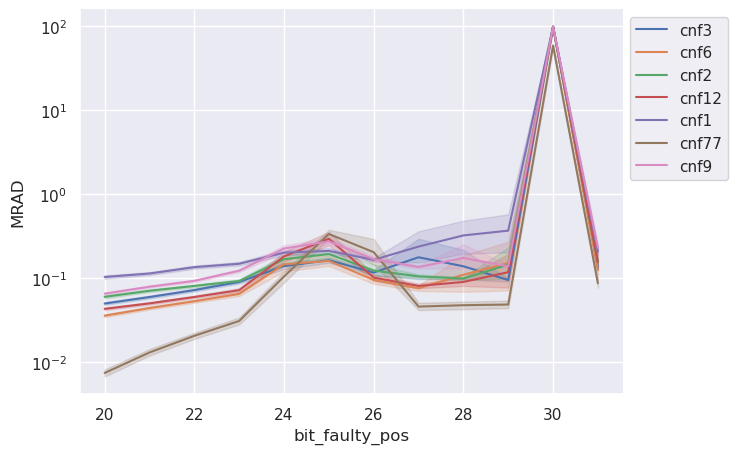

In [5]:

index = Final_report['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_yscale('log')
#ax.set_yscale('log')

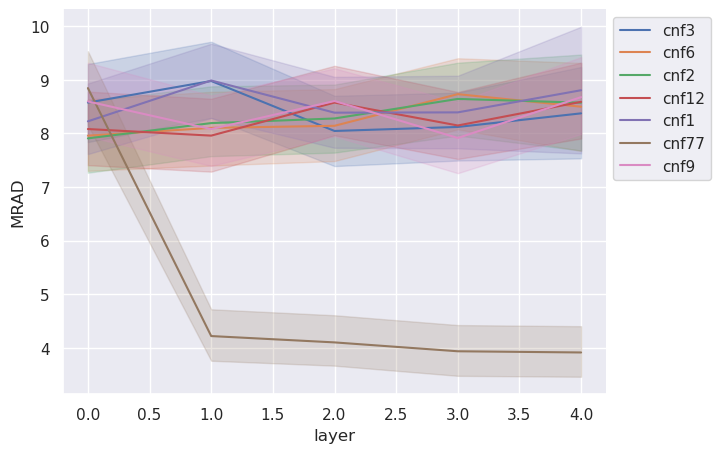

In [11]:

index = Final_report['bit_faulty_pos']>0

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='layer',y='MRAD',hue='split_config')
ax.legend(loc='lower left')
ax.tick_params(axis='x', labelrotation=0)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

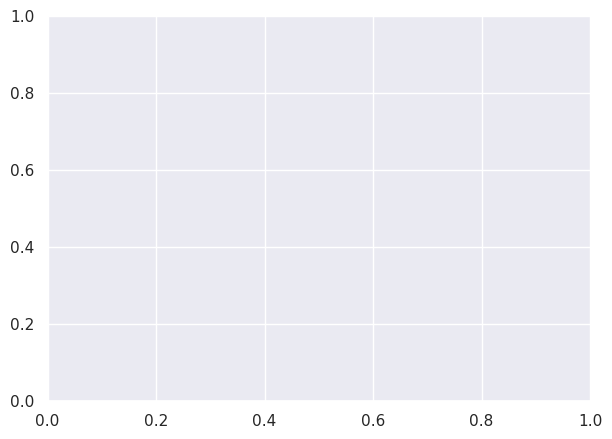

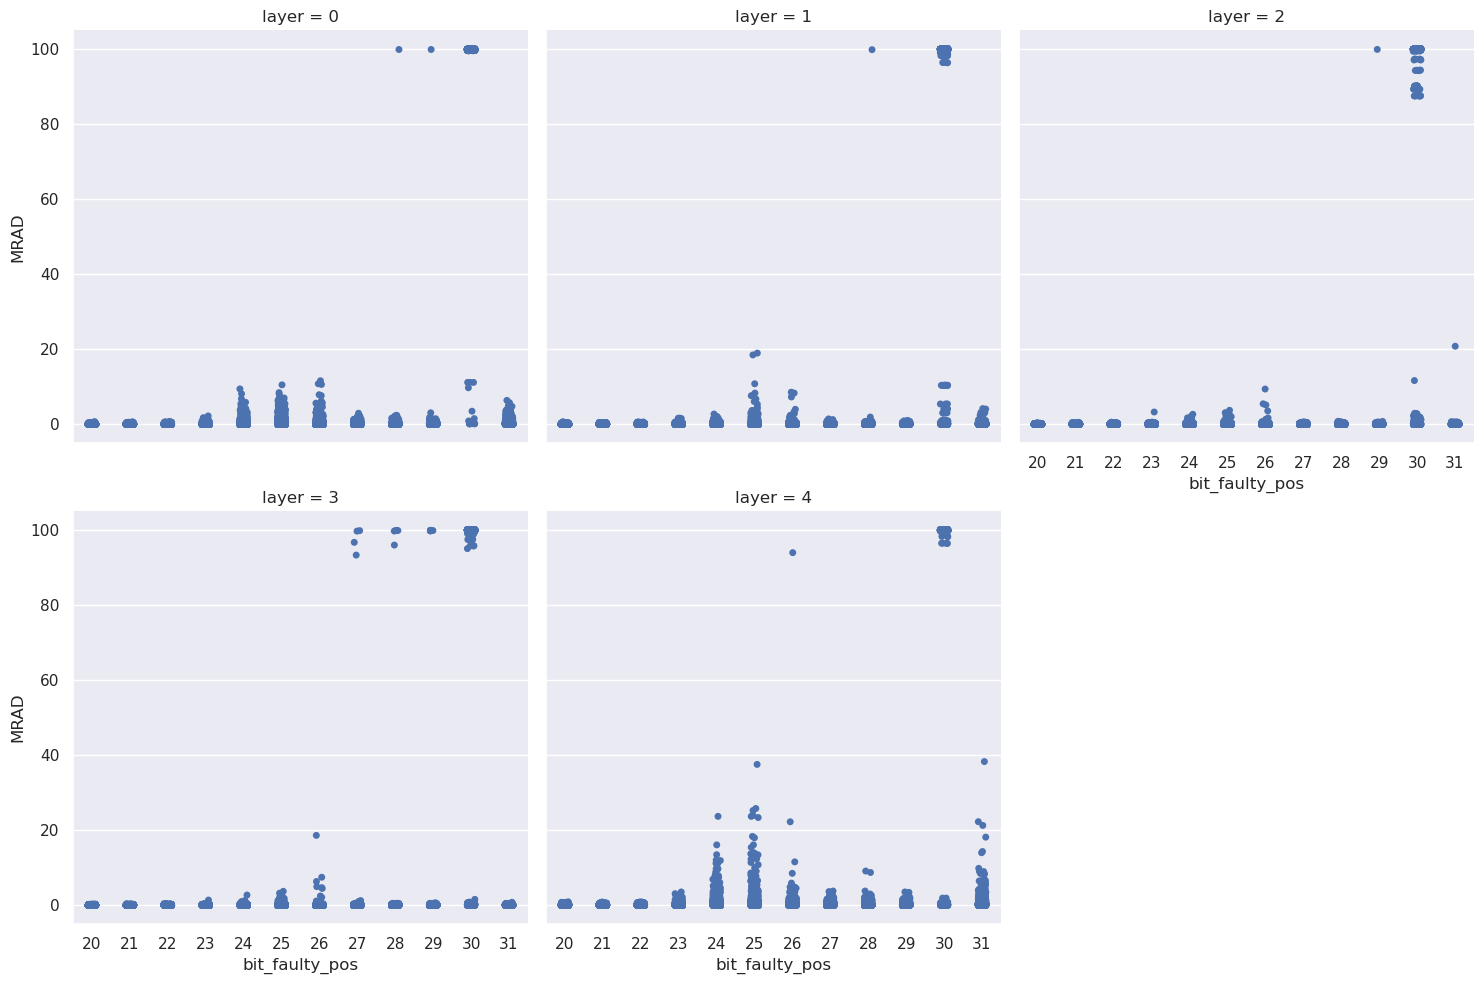

In [13]:
index = Final_report['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.catplot(data=Final_report.loc[index], col='layer', x='bit_faulty_pos',y='MRAD',col_wrap=3,color='C0')



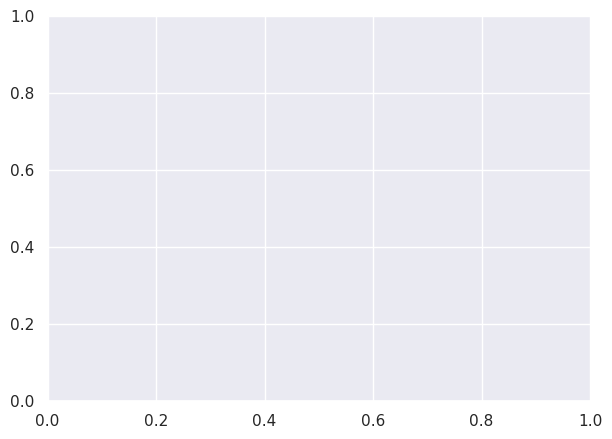

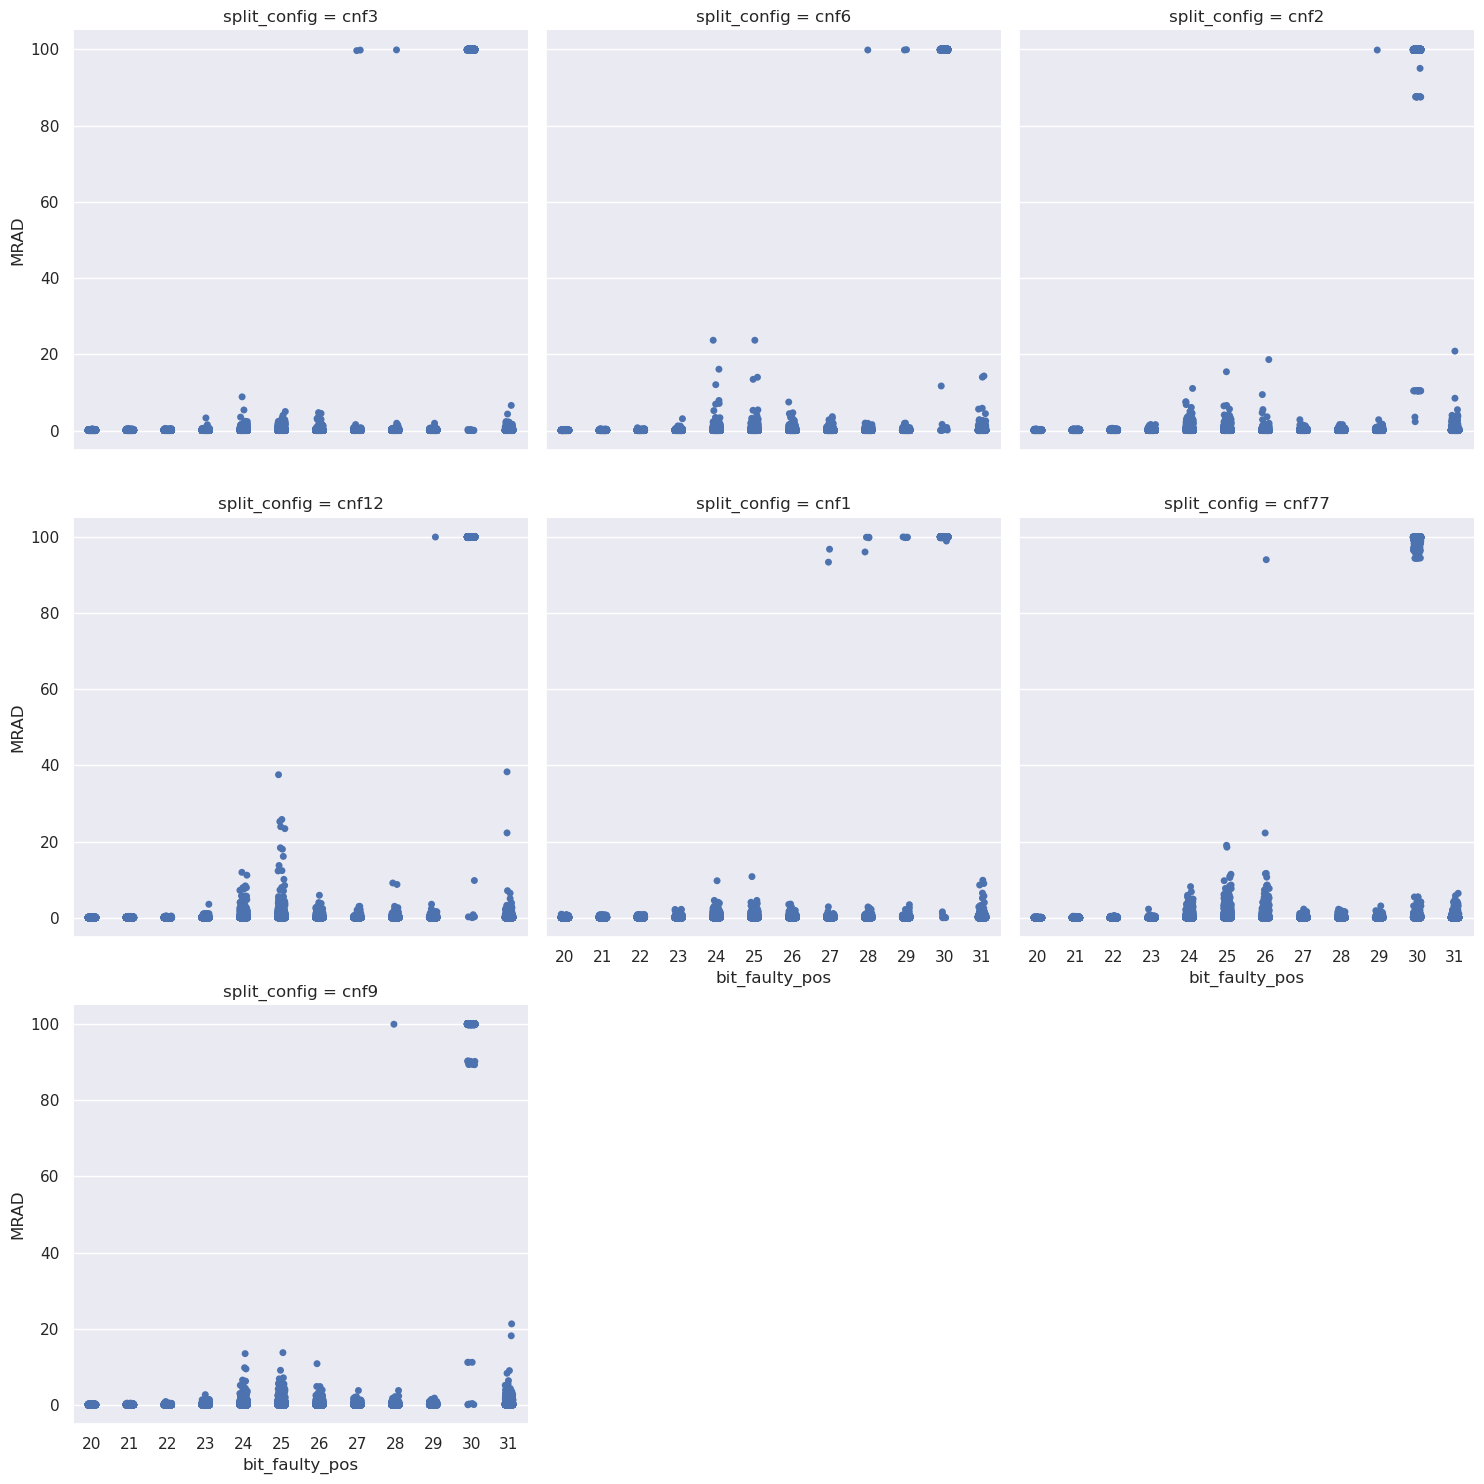

In [15]:
index = Final_report['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.catplot(data=Final_report.loc[index], col='split_config', x='bit_faulty_pos',y='MRAD',col_wrap=3,color='C0')


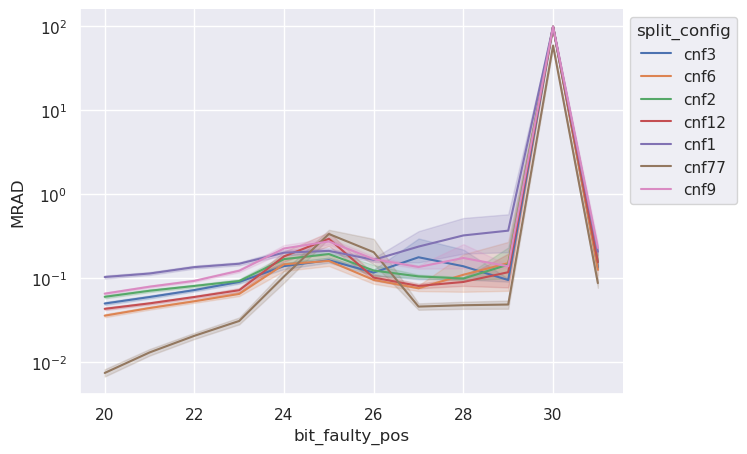

In [4]:
index = Final_report['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='MRAD', hue='split_config')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_yscale('log')

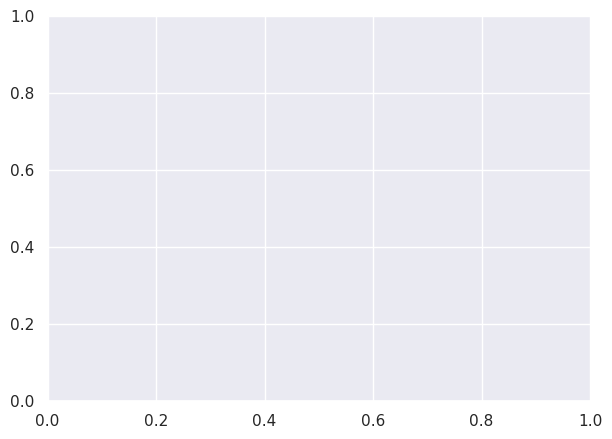

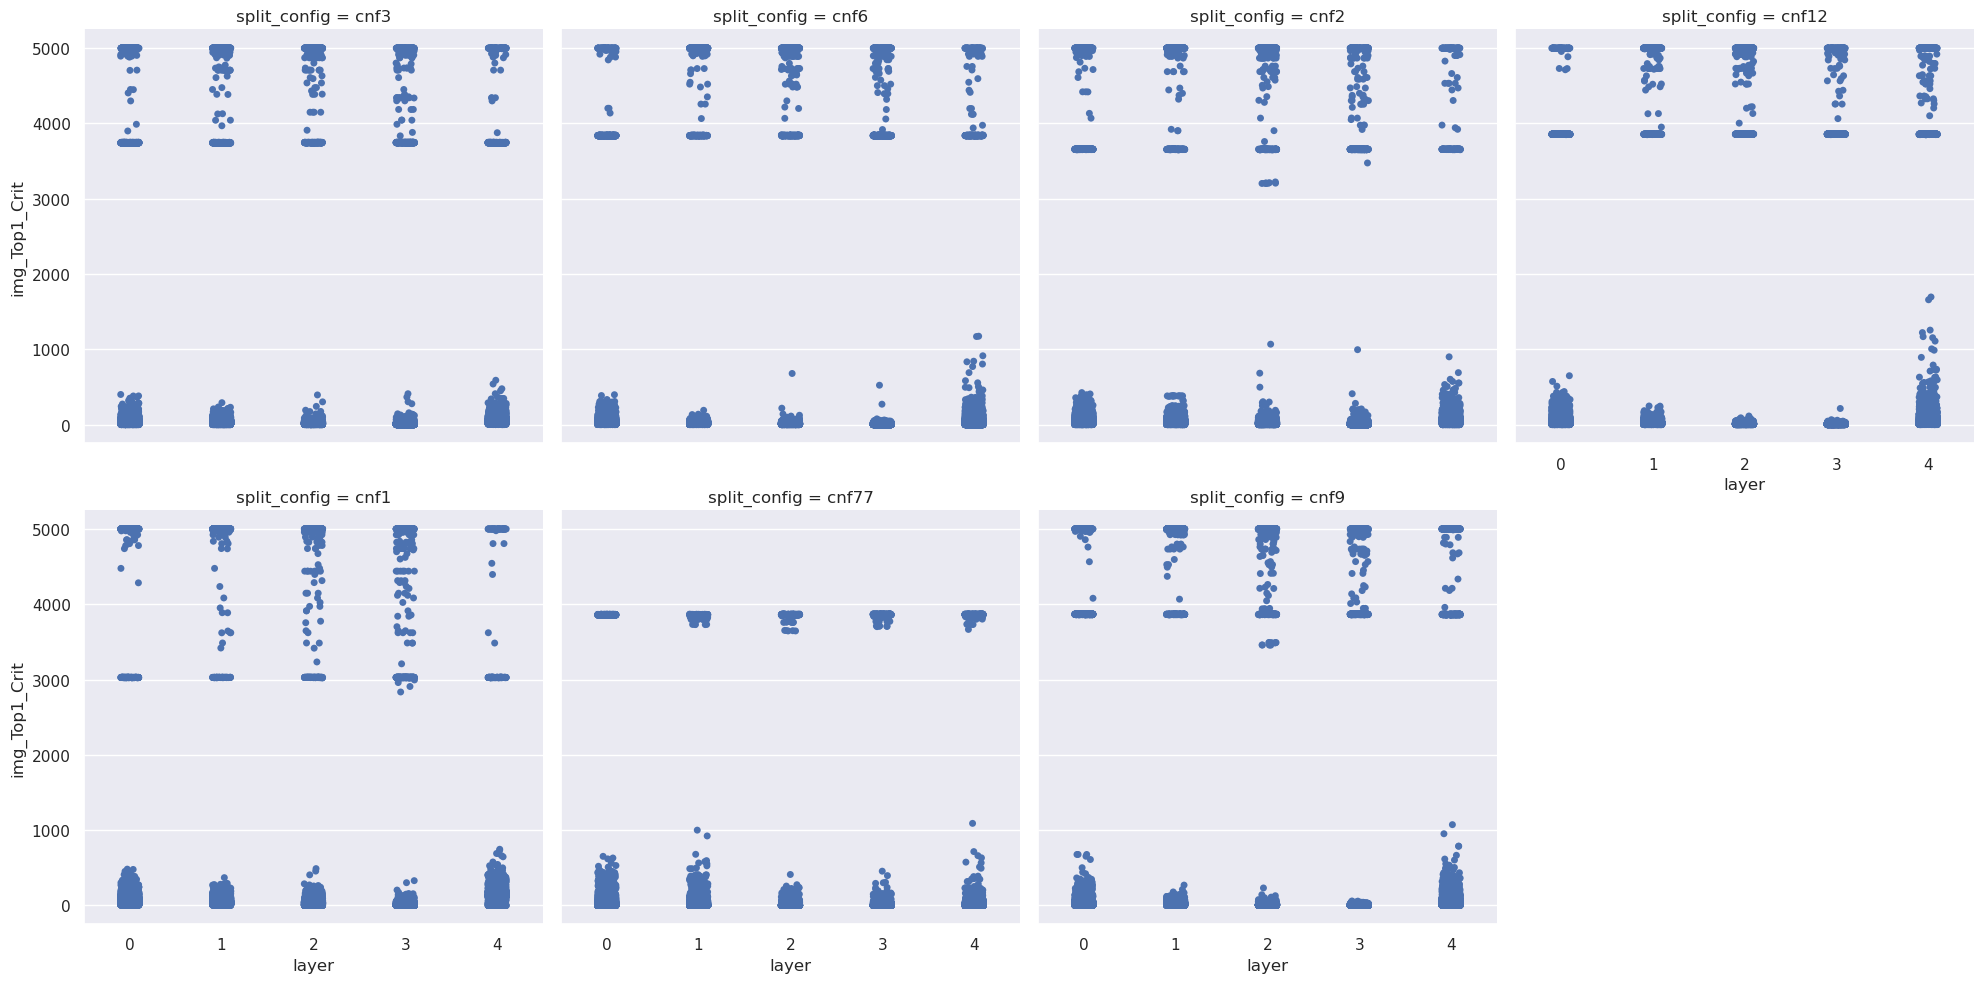

In [19]:
index = Final_report['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.catplot(data=Final_report.loc[index], col='split_config', x='layer',y='img_Top1_Crit',col_wrap=4,color='C0')


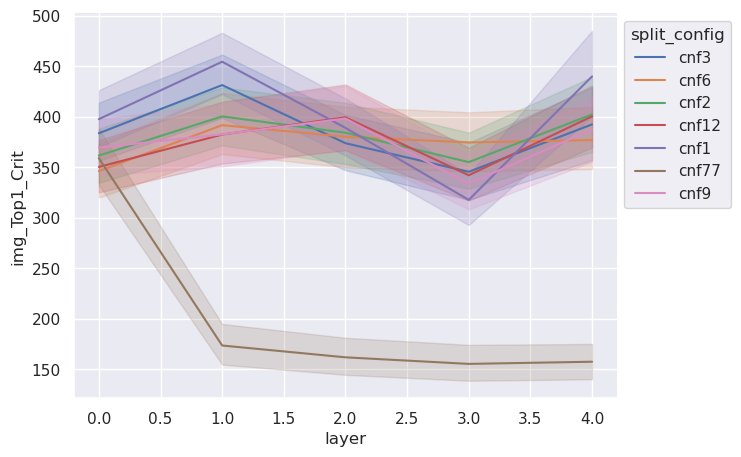

In [24]:
index = Final_report['bit_faulty_pos']>15
Final_report['layer']=Final_report['layer'].astype(int)
sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='layer',y='img_Top1_Crit', hue='split_config')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_yscale('log')

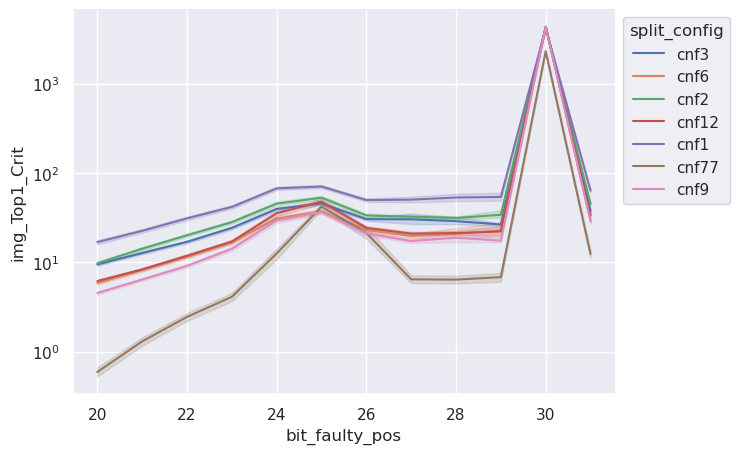

In [27]:
index = Final_report['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.lineplot(data=Final_report.loc[index],x='bit_faulty_pos',y='img_Top1_Crit', hue='split_config')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_yscale('log')

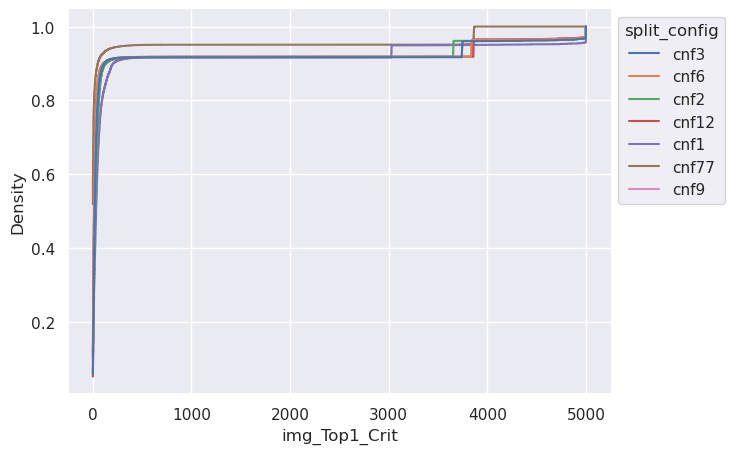

In [8]:
index = Final_report['bit_faulty_pos']>15

sns.set()
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
ax = sns.histplot(data=Final_report.loc[index],x='img_Top1_Crit',hue='split_config', element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#ax.set_yscale('log')